<a href="https://colab.research.google.com/github/Kopfgeldjaeger/Covid-19_in_germany/blob/master/covid_19_29_02_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
cwd = os.getcwd()
print(cwd)
%ls 
print('\t')
from zipfile import ZipFile
file_name = 'vg2500_geo84.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done.')
%ls

/content
covid19_de.xlsx  sample_data/  vg2500_geo84.zip
	
Done.
aktualitaet.txt  vg2500_bld.shp    vg2500_krs.shp  vg2500_rbz.shx
covid19_de.xlsx  vg2500_bld.shx    vg2500_krs.shx  vg2500_sta.dbf
sample_data/     vg2500_geo84.zip  vg2500_rbz.dbf  vg2500_sta.prj
vg2500_bld.dbf   vg2500_krs.dbf    vg2500_rbz.prj  vg2500_sta.shp
vg2500_bld.prj   vg2500_krs.prj    vg2500_rbz.shp  vg2500_sta.shx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 931kB 8.5MB/s 
     |████████████████████████████████| 10.4MB 70.7MB/s 
     |████████████████████████████████| 14.7MB 213kB/s 


In [3]:
fp = "vg2500_bld.shp"

map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,USE,RS,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."


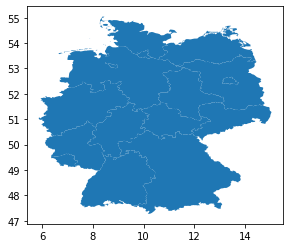

In [4]:
map_df.plot()

In [5]:
map_df

,USE,RS,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."
5,2,07,070000000000,Rheinland-Pfalz,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ..."
6,2,08,080000000000,Baden-Württemberg,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7..."
7,2,09,090000000000,Bayern,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081..."
8,2,10,100000000000,Saarland,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ..."
9,2,11,110000000000,Berlin,1.807512e+05,8.864801e+08,"POLYGON ((13.61192 52.54332, 13.62461 52.53797..."


In [6]:
con= pd.read_excel("covid19_de.xlsx",header=0)
con= con.fillna(0)
con

,GEN,27_01_2020,28_01_2020,29_01_2020,30_01_2020,31_01_2020,01_02_2020,02_02_2020,03_02_2020,04_02_2020,05_02_2020,06_02_2020,07_02_2020,08_02_2020,09_02_2020,10_02_2020,11_02_2020,12_02_2020,13_02_2020,14_02_2020,15_02_2020,16_02_2020,17_02_2020,18_02_2020,19_02_2020,20_02_2020,21_02_2020,22_02_2020,23_02_2020,24_02_2020,25_02_2020,26_02_2020,27_02_2020,28_02_2020
0,Hamburg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Niedersachsen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bremen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nordrhein-Westfalen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,34.0
4,Hessen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
5,Rheinland-Pfalz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6,Baden-Württemberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,8.0,12.0
7,Bayern,1.0,4.0,4.0,5.0,7.0,8.0,10.0,10.0,12.0,12.0,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,15.0
8,Saarland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Berlin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:

print(con.index[2])
#con = con[['GEN','27_01_2020']]
#con =con.loc[:, ['GEN','27_01_2020','28_01_2020']]
con = con[['GEN','27_01_2020','28_01_2020','31_01_2020','02_02_2020','04_02_2020','10_02_2020','14_02_2020','25_02_2020','26_02_2020','27_02_2020','28_02_2020']]
con
#con = con[['GEN','2020_01_27','2020_01_28','2020_01_30','2020_01_31','2020_02_01','2020_02_02','2020_02_04','2020_02_06','2020_02_07','2020_02_12','2020_02_25','2020_02_26','2020_02_27']]

2


,GEN,27_01_2020,28_01_2020,31_01_2020,02_02_2020,04_02_2020,10_02_2020,14_02_2020,25_02_2020,26_02_2020,27_02_2020,28_02_2020
0,Hamburg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Niedersachsen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bremen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nordrhein-Westfalen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,34.0
4,Hessen,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,3.0
5,Rheinland-Pfalz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6,Baden-Württemberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,8.0,12.0
7,Bayern,1.0,4.0,7.0,10.0,12.0,14.0,14.0,14.0,14.0,14.0,15.0
8,Saarland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Berlin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
merged = map_df.set_index('GEN').join(con.set_index('GEN'))
merged

,USE,RS,RS_ALT,SHAPE_LENG,SHAPE_AREA,geometry,27_01_2020,28_01_2020,31_01_2020,02_02_2020,04_02_2020,10_02_2020,14_02_2020,25_02_2020,26_02_2020,27_02_2020,28_02_2020
GEN,,,,,,,,,,,,,,,,,
Hamburg,2,02,020000000000,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Niedersachsen,2,03,030000000000,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bremen,2,04,040000000000,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nordrhein-Westfalen,2,05,050000000000,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,34.0
Hessen,2,06,060000000000,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ...",0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,3.0
Rheinland-Pfalz,2,07,070000000000,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
Baden-Württemberg,2,08,080000000000,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,8.0,12.0
Bayern,2,09,090000000000,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081...",1.0,4.0,7.0,10.0,12.0,14.0,14.0,14.0,14.0,14.0,15.0
Saarland,2,10,100000000000,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


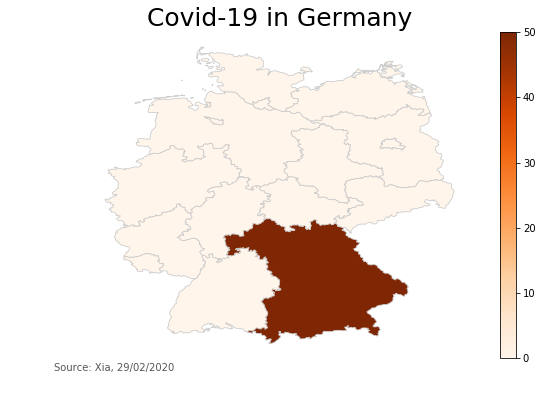

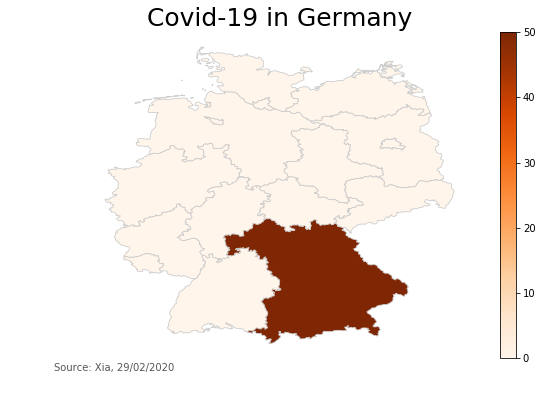

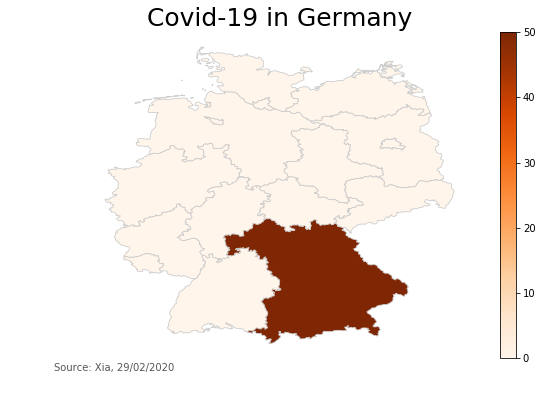

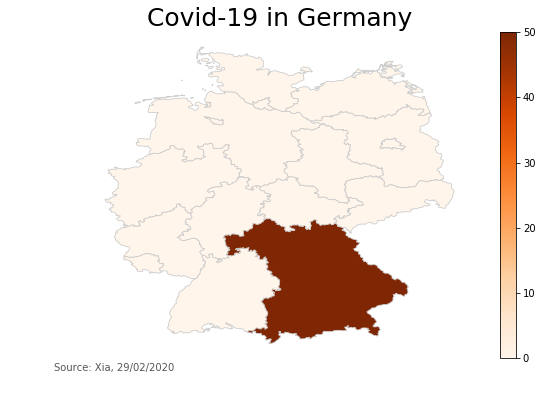

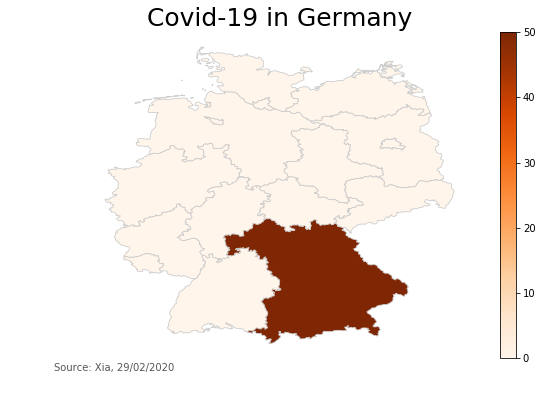

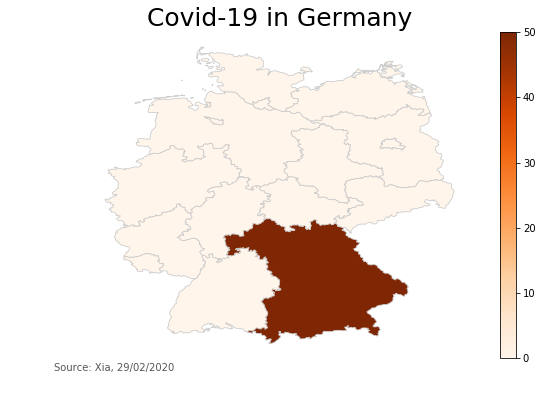

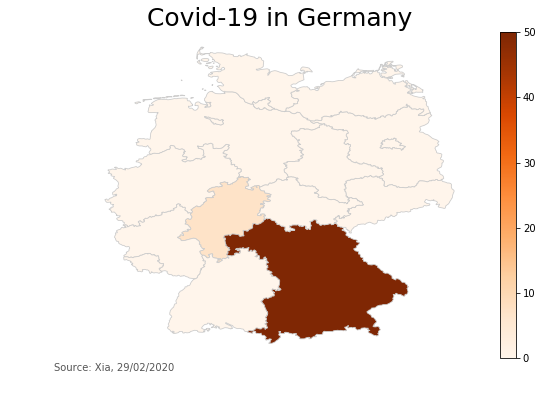

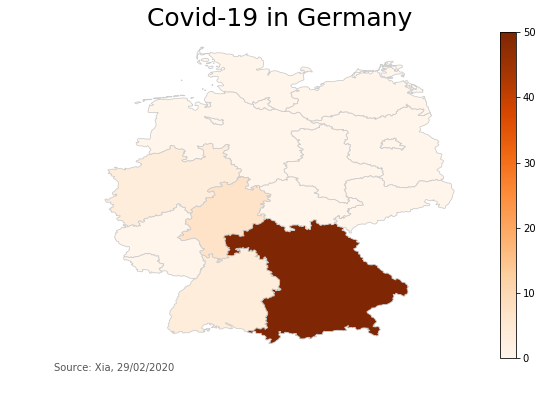

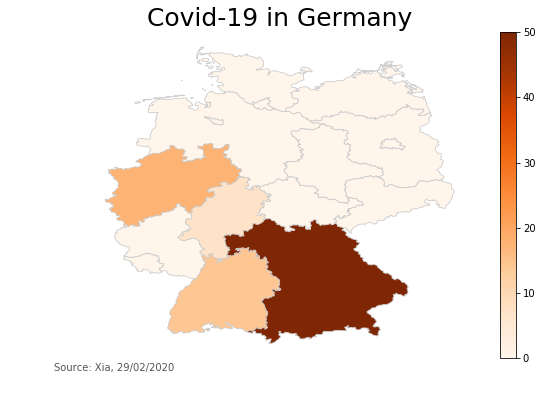

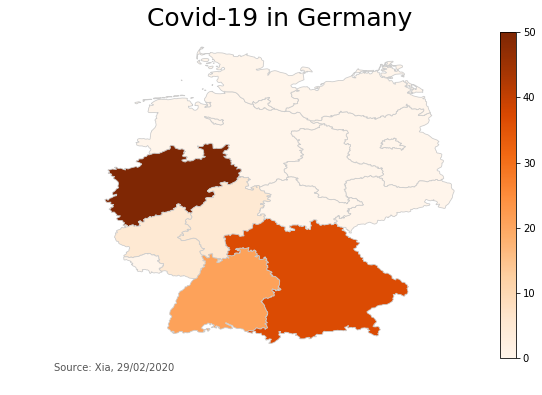

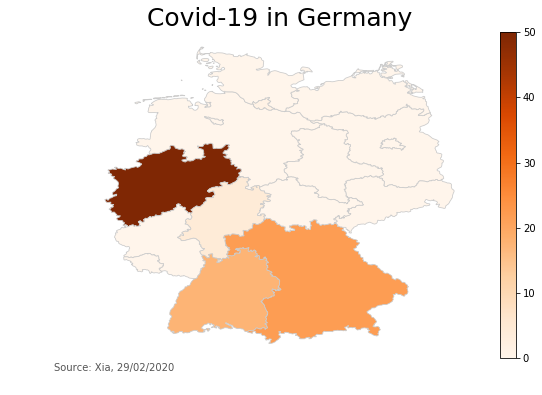

In [15]:
Vlist = ['27_01_2020','28_01_2020','31_01_2020','02_02_2020','04_02_2020','10_02_2020','14_02_2020','25_02_2020','26_02_2020','27_02_2020','28_02_2020']
n=0
# set a variable that will call whatever column we want to visualise on the map
for i in Vlist:
  variable = i
  n=n+1
  # set the range for the choropleth
  vmin, vmax = 0, 50

  # create figure and axes for Matplotlib
  fig, ax = plt.subplots(1, figsize=(10, 6))
  merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')
  # remove the axis
  ax.axis('off')

  # add a title
  ax.set_title('Covid-19 in Germany', \
                fontdict={'fontsize': '25',
                          'fontweight' : '3'})
  ax.annotate('Source: Xia, 29/02/2020',
            xy=(0.1, .08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=10, color='#555555')
  sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
  sm._A = []
  cbar = fig.colorbar(sm)
  fig.savefig(str(n)+'testmap.png', dpi=300)

In [0]:
import matplotlib.animation as animation
# this methode with plt a gif to generate hasn't been finished.


In [0]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

In [0]:
!convert -version


Version: ImageMagick 6.9.7-4 Q16 x86_64 20170114 http://www.imagemagick.org
Copyright: © 1999-2017 ImageMagick Studio LLC
License: http://www.imagemagick.org/script/license.php
Features: Cipher DPC Modules OpenMP 
Delegates (built-in): bzlib djvu fftw fontconfig freetype jbig jng jpeg lcms lqr ltdl lzma openexr pangocairo png tiff wmf x xml zlib


In [0]:
!convert -delay 20 -loop 0 1testmap.png 2testmap.png 3testmap.png 4testmap.png 5testmap.png 6testmap.png 7testmap.png 8testmap.png 9testmap.png 10testmap.png covid19_de.gif